In [1]:
import pandas as pd
import numpy as np
from solaroi import Solaroi
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()

#df = pd.read_excel('./Fiez_Deriaz_01012021-27112023.xlsx', index_col='Date et heure')
df = pd.read_excel('./data_short.xlsx', index_col='Date et heure')

df = df[df.index <= pd.Timestamp('2021.07.25')]

df

,Courant AC L1 | Symo 15.0-3-M (1) [A],Courant AC L2 | Symo 15.0-3-M (1) [A],Courant AC L3 | Symo 15.0-3-M (1) [A],Courant DC MPP1 | Symo 15.0-3-M (1) [A],Courant DC MPP2 | Symo 15.0-3-M (1) [A],Énergie | Symo 15.0-3-M (1) [Wh],Énergie MPP1 | Symo 15.0-3-M (1) [Wh],Énergie MPP2 | Symo 15.0-3-M (1) [Wh],Facteur de puissance | Symo 15.0-3-M (1) [1],Puissance apparente | Symo 15.0-3-M (1) [VA],...,Production photovoltaïque [Wh],Puissance apparente L1 point d'injection | PowerMeter [VA],Puissance apparente L2 point d'injection | PowerMeter [VA],Puissance apparente L3 point d'injection | PowerMeter [VA],Puissance effective L1 point d'injection | PowerMeter [W],Puissance effective L2 point d'injection | PowerMeter [W],Puissance effective L3 point d'injection | PowerMeter [W],Tension AC L1 point d'injection | PowerMeter [V],Tension AC L2 point d'injection | PowerMeter [V],Tension AC L3 point d'injection | PowerMeter [V]
Date et heure,,,,,,,,,,,,,,,,,,,,,
2021-07-20 13:20:00,3.7300,3.7600,3.6900,2.3800,2.2500,53.21638,27.69,25.53,1.0,1419.18,...,53.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 13:25:00,3.7883,3.8185,3.7486,2.4295,2.2820,123.31094,64.22,59.09,1.0,1470.01,...,123.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-20 13:30:00,12.5300,12.5900,12.5400,9.8600,7.0800,757.84823,449.48,308.37,1.0,9094.63,...,757.85,3643.47,3939.48,3979.93,-3624.82,-3934.44,-3965.30,242.30,242.40,242.00
2021-07-20 13:35:00,17.7515,17.8012,17.7714,18.1006,9.1598,1072.74079,708.34,364.40,1.0,12916.42,...,1072.74,3823.96,4023.27,4038.77,-3809.89,-4019.59,-4024.18,242.27,242.01,241.68
2021-07-20 13:40:00,17.9700,17.9800,17.9800,18.1900,9.1300,1085.61893,718.25,367.37,1.0,13028.04,...,1085.62,3954.32,4048.46,4077.05,-3943.29,-4044.23,-4063.07,241.89,241.58,241.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-24 23:40:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00,0.00,0.0,0.00,...,0.00,339.28,362.50,388.13,242.88,319.17,277.98,243.44,243.63,243.89
2021-07-24 23:45:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00,0.00,0.0,0.00,...,0.00,344.80,352.89,386.70,249.35,309.55,277.24,243.57,243.56,243.83
2021-07-24 23:50:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00,0.00,0.0,0.00,...,0.00,341.24,353.09,387.17,245.19,310.01,277.77,243.60,243.48,243.96


In [3]:
s = Solaroi()
s.load(df['Consommation [Wh]'], df['Production photovoltaïque [Wh]'], dt=5*60)

In [21]:
battery_capacity = 10e3 # [Wh]
max_battery_charge = 10e3 # [W]
max_battery_discharge = 10e3 # [W]
roundtrip_efficiency = 1

grid, storage = s.run(battery_capacity, max_battery_charge, max_battery_discharge, roundtrip_efficiency)

df['storage'] = storage
df['grid'] = grid

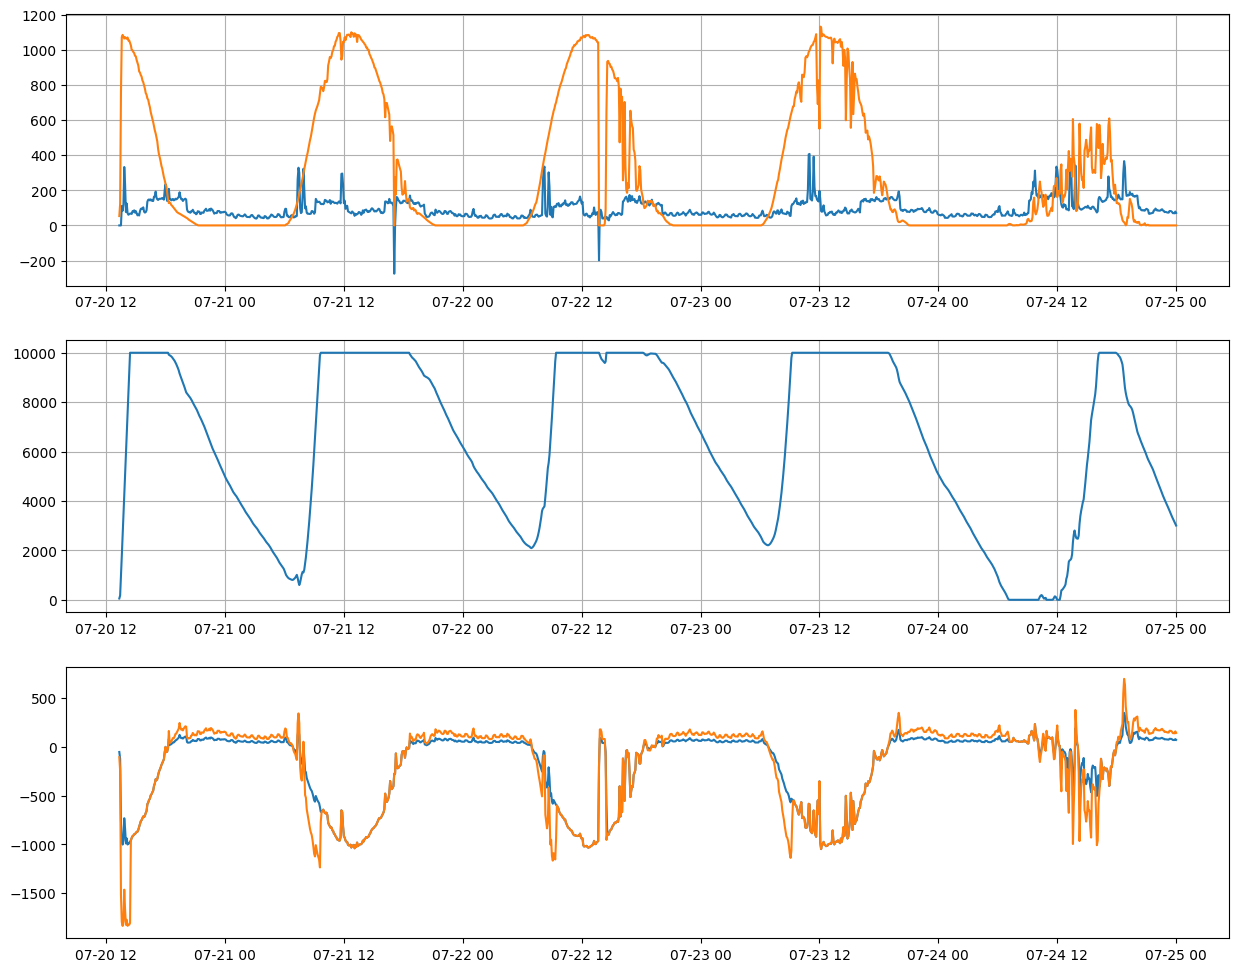

In [22]:
plt.figure(figsize=(15,12))
plt.subplot(311)
plt.plot(df['Consommation [Wh]'])
plt.plot(df['Production photovoltaïque [Wh]'])
plt.grid()
plt.subplot(312)
plt.plot(df['storage'])
plt.grid()
plt.subplot(313)
plt.plot(df['Consommation [Wh]']-df['Production photovoltaïque [Wh]'])
plt.plot(df['grid'])
plt.show()